### Importação dos dados



In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
# url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
# url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
# url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
# url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

url1 = "./base-de-dados-challenge-1/loja_1.csv"
url2 = "./base-de-dados-challenge-1/loja_2.csv"
url3 = "./base-de-dados-challenge-1/loja_3.csv"
url4 = "./base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [102]:
# Identificar a origem de cada loja antes de juntar
loja1['Loja_ID'] = 'Loja 1'
loja2['Loja_ID'] = 'Loja 2'
loja3['Loja_ID'] = 'Loja 3'
loja4['Loja_ID'] = 'Loja 4'

In [103]:
# Concatenar todos os dataframes em um único (Vetorização)
df_total = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

In [104]:
# Tratamento de Dados - Removemos espaços e convertemos para float
df_total['Preço'] = pd.to_numeric(df_total['Preço'], errors='coerce')
df_total['Frete'] = pd.to_numeric(df_total['Frete'], errors='coerce')

In [105]:
# Analise de nulos
df_total.isnull().sum()

Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
Loja_ID                   0
dtype: int64

In [106]:
# Tratamento de Dados - Remover linhas que possam ter ficado com valores nulos após a conversão
df_total = df_total.dropna(subset=['Preço', 'Frete'])

In [107]:
# Análise Final: Agrupar por Loja e somar o Faturamento
faturamento_por_loja = df_total.groupby('Loja_ID')['Preço'].sum().sort_values(ascending=False)

In [108]:
# Formatar para visualização (R$)
print("Faturamento Total por Loja:")
print("-" * 30)
for loja_id, valor in faturamento_por_loja.items():
    print(f"{loja_id}: R$ {valor:,.2f}")

Faturamento Total por Loja:
------------------------------
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


# 2. Vendas por Categoria

In [109]:
# Limpeza rápida: remover espaços em branco extras se houver string
df_total['Categoria do Produto'] = df_total['Categoria do Produto'].str.strip()

In [110]:
# --- Visão Geral (Todas as lojas) ---
print("--- Categoria Mais Popular (Geral) ---")

popularidade_geral = df_total['Categoria do Produto'].value_counts()
categoria_top_geral = popularidade_geral.idxmax()
qtd_top_geral = popularidade_geral.max()

print(f"Categoria vencedora: {categoria_top_geral} (Total de vendas: {qtd_top_geral})")
print("\nTop 5 Categorias Geral:")
print(popularidade_geral.head())

--- Categoria Mais Popular (Geral) ---
Categoria vencedora: moveis (Total de vendas: 1886)

Top 5 Categorias Geral:
Categoria do Produto
moveis              1886
eletronicos         1772
brinquedos          1290
eletrodomesticos    1149
esporte e lazer     1113
Name: count, dtype: int64


In [111]:
# --- ANÁLISE 2: Por Loja ---
print("\n--- Categoria Mais Popular (Por Loja) ---")

# Agrupamos por loja e categoria e contamos o tamanho (size)
analise_por_loja = df_total.groupby(['Loja_ID', 'Categoria do Produto']).size().reset_index(name='Vendas')

# Ordenamos por Loja e depois por Quantidade (Decrescente)
analise_por_loja = analise_por_loja.sort_values(['Loja_ID', 'Vendas'], ascending=[True, False])

# Pegamos apenas a primeira linha de cada grupo de loja (a mais popular)
top_por_loja = analise_por_loja.groupby('Loja_ID').first()

print(top_por_loja)


--- Categoria Mais Popular (Por Loja) ---
        Categoria do Produto  Vendas
Loja_ID                             
Loja 1                moveis     465
Loja 2                moveis     442
Loja 3                moveis     499
Loja 4                moveis     480


# 3. Média de Avaliação das Lojas


In [112]:
# Agrupar pelo nome da loja e calcular a média
media_por_loja = df_total.groupby('Loja_ID')['Avaliação da compra'].mean().reset_index()

In [113]:

# Ordenar da maior para a menor nota e formatar
media_por_loja = media_por_loja.sort_values(by='Avaliação da compra', ascending=False)
media_por_loja.columns = ['Loja_ID', 'Média de Avaliação']

print(media_por_loja)

  Loja_ID  Média de Avaliação
2  Loja 3            4.048326
1  Loja 2            4.037304
3  Loja 4            3.995759
0  Loja 1            3.976685


# 4. Produtos Mais e Menos Vendidos

In [114]:
# --- VISÃO GERAL (TODAS AS LOJAS) ---
print("--- VISÃO GERAL DE VENDAS (TODAS AS LOJAS) ---")

# Agrupar por produto e somar a preço
vendas_geral = df_total.groupby('Produto')['Produto'].value_counts().sort_values(ascending=False)

# Produtos mais vendidos
print(f"\nTop 5 Produtos Mais Vendidos (Geral):\n{vendas_geral.head(5)}")

# Produtos menos vendidos
print(f"\nTop 5 Produtos Menos Vendidos (Geral):\n{vendas_geral.tail(5)}")

--- VISÃO GERAL DE VENDAS (TODAS AS LOJAS) ---

Top 5 Produtos Mais Vendidos (Geral):
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Name: count, dtype: int64

Top 5 Produtos Menos Vendidos (Geral):
Produto
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


In [115]:
# --- VISÃO POR LOJA ---
print("\n" + "="*50 + "\n")
print("--- ANÁLISE DETALHADA POR LOJA ---")

# Agrupar por Loja e Produto
vendas_por_loja = df_total.groupby(['Loja_ID', 'Produto'])['Produto'].value_counts().reset_index()

# Iterar sobre cada loja para mostrar seus rankings individuais
lojas_unicas = df_total['Loja_ID'].unique()

for nome_loja in sorted(lojas_unicas):
    print(f"\n>> Análise: {nome_loja}")
    
    # Filtrar dados apenas da loja atual
    dados_loja = vendas_por_loja[vendas_por_loja['Loja_ID'] == nome_loja]
    
    # Ordenar do maior para o menor
    dados_loja_sorted = dados_loja.sort_values(by='Produto', ascending=False)
    
    # Pegar o mais vendido e o menos vendido
    # .iloc[0] é o primeiro (mais vendido), .iloc[-1] é o último (menos vendido)
    mais_vendido = dados_loja_sorted.iloc[0]
    menos_vendido = dados_loja_sorted.iloc[-1]
    
    print(f"   Mais vendido: {mais_vendido['Produto']} ({mais_vendido['count']} un.)")
    print(f"   Menos vendido: {menos_vendido['Produto']} ({menos_vendido['count']} in.)")



--- ANÁLISE DETALHADA POR LOJA ---

>> Análise: Loja 1
   Mais vendido: Xadrez de madeira (49 un.)
   Menos vendido: Assistente virtual (40 in.)

>> Análise: Loja 2
   Mais vendido: Xadrez de madeira (45 un.)
   Menos vendido: Assistente virtual (38 in.)

>> Análise: Loja 3
   Mais vendido: Xadrez de madeira (47 un.)
   Menos vendido: Assistente virtual (39 in.)

>> Análise: Loja 4
   Mais vendido: Xadrez de madeira (39 un.)
   Menos vendido: Assistente virtual (50 in.)


# 5. Frete Médio por Loja

In [116]:
# Calcula a média do frete agrupando por Loja
custo_medio_frete = df_total.groupby('Loja_ID')['Frete'].mean().reset_index()

In [117]:
# Formatação opcional para exibição
custo_medio_frete.rename(columns={'Frete': 'Media_Frete'}, inplace=True)
custo_medio_frete = custo_medio_frete.sort_values('Media_Frete')

print(custo_medio_frete)

  Loja_ID  Media_Frete
3  Loja 4    31.278997
2  Loja 3    33.074464
1  Loja 2    33.621941
0  Loja 1    34.691805


# Análise Gráfica

In [118]:
df_total.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja_ID'],
      dtype='object')

In [119]:
# Refazendos as metricas
analysis = df_total.groupby('Loja_ID').agg({
    'Preço': ['mean', 'sum'],  # "Média de vendas", "Faturamento"
    'Avaliação da compra': 'mean'        # "Média de avaliação"
})

In [120]:
# inclusão dos nomes das colunas
analysis.columns = ['Media_Vendas', 'Faturamento_Total', 'Media_Avaliacao']

In [121]:
print("--- TABELA DE METRICAS ---")
print(analysis)

--- TABELA DE METRICAS ---
         Media_Vendas  Faturamento_Total  Media_Avaliacao
Loja_ID                                                  
Loja 1     650.491361         1534509.12         3.976685
Loja 2     630.970352         1488459.06         4.037304
Loja 3     620.612560         1464025.03         4.048326
Loja 4     587.149101         1384497.58         3.995759


In [122]:
# Pegando o estilo
plt.style.use('ggplot')

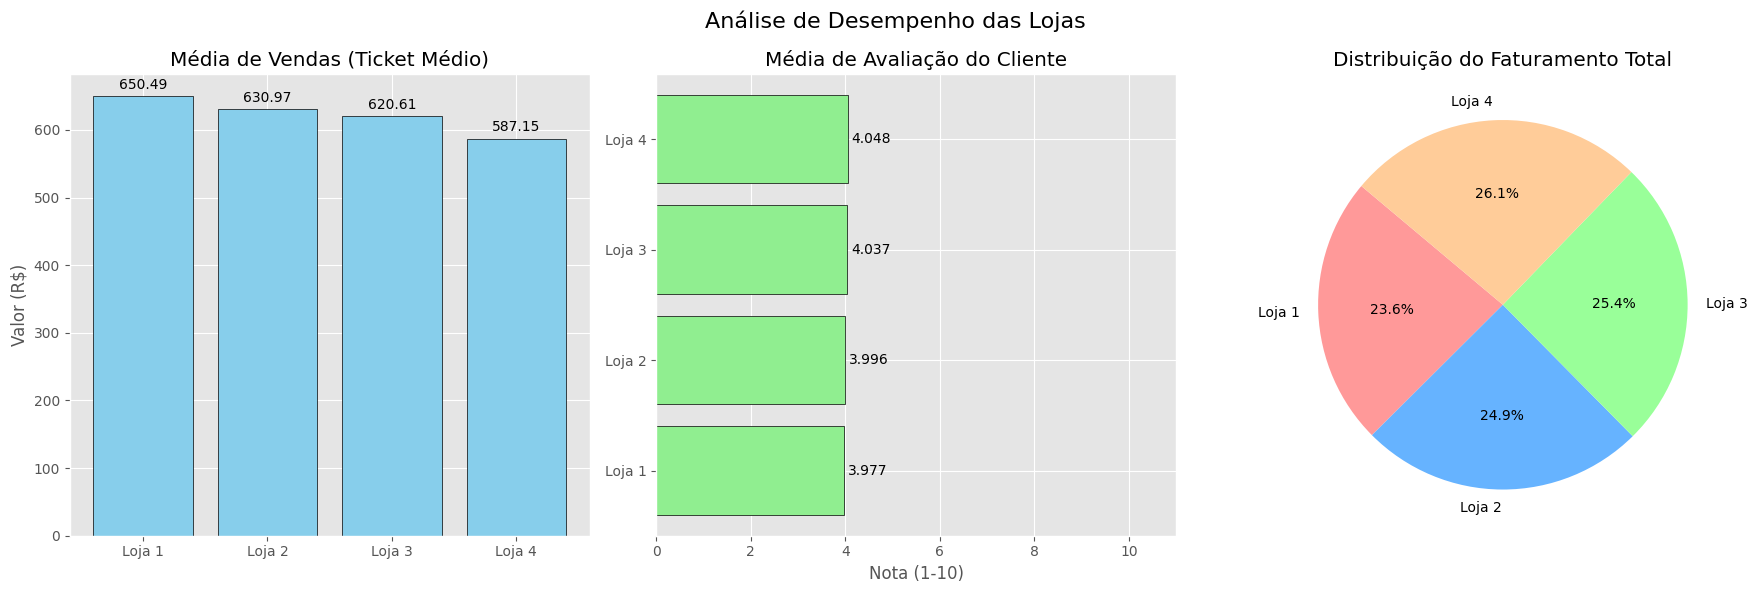

In [123]:
# GRÁFICOS
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Análise de Desempenho das Lojas', fontsize=16)

# GRAPH 1: Bar Chart - Média de Vendas
bars = axes[0].bar(analysis.index, analysis['Media_Vendas'], color='skyblue', edgecolor='black')
axes[0].set_title('Média de Vendas (Ticket Médio)')
axes[0].set_ylabel('Valor (R$)')
axes[0].bar_label(bars, fmt='%.2f', padding=3)

# GRAPH 2: Horizontal Bar Chart - Média de Avaliação
h_bars = axes[1].barh(analysis.index, analysis['Media_Avaliacao'].sort_values(ascending=True), color='lightgreen', edgecolor='black')
axes[1].set_title('Média de Avaliação do Cliente')
axes[1].set_xlabel('Nota (1-10)')
axes[1].set_xlim(0, 11)
axes[1].bar_label(h_bars, fmt='%.3f', padding=3)

# GRAPH 3: Pie Chart - Faturamento Total
axes[2].pie(analysis['Faturamento_Total'].sort_values(ascending=True), 
            labels=analysis.index, 
            autopct='%1.1f%%', 
            startangle=140, 
            colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axes[2].set_title('Distribuição do Faturamento Total')


plt.tight_layout()
plt.show()

### RECOMENDAÇÃO

In [129]:
print("--- ANALISE CONCLUSIVAS --- \n")

# 1. Calcular as Métricas por Loja
metrics = df_total.groupby('Loja_ID').agg(
    Total_Vendas=('Produto', 'count'),
    Receita_Total=('Preço', 'sum'),
    Frete_Medio=('Frete', 'mean'),
    Avaliacao_Media=('Avaliação da compra', 'mean')
).reset_index()

# 2. Formatar as colunas
metrics['Receita_Total'] = metrics['Receita_Total'].map('{:,.2f}'.format)
metrics['Frete_Medio'] = metrics['Frete_Medio'].map('{:,.2f}'.format)
metrics['Avaliacao_Media'] = metrics['Avaliacao_Media'].map('{:,.2f}'.format)

# Renomear colunas para o relatório
metrics.columns = ['Loja', 'Total de Vendas', 'Receita Total (R$)', 'Frete Médio (R$)', 'Avaliação Média (1-5)']

# Imprimir as métricas
print(metrics.to_markdown(index=False))

--- ANALISE CONCLUSIVAS --- 

| Loja   |   Total de Vendas | Receita Total (R$)   |   Frete Médio (R$) |   Avaliação Média (1-5) |
|:-------|------------------:|:---------------------|-------------------:|------------------------:|
| Loja 1 |              2359 | 1,534,509.12         |              34.69 |                    3.98 |
| Loja 2 |              2359 | 1,488,459.06         |              33.62 |                    4.04 |
| Loja 3 |              2359 | 1,464,025.03         |              33.07 |                    4.05 |
| Loja 4 |              2358 | 1,384,497.58         |              31.28 |                    4    |


✅ Conclusão e Recomendação para o Sr. João

O objetivo do Sr. João é maximizar o dinheiro para um novo negócio, tornando a Receita Total a métrica primária.

Loja Indicada: *Loja 1*

A Loja 1 gerou a maior Receita Total: $\text{R\$ 1.534.509,12}$ entre todas as lojas, garantindo o maior capital bruto para o investimento. Embora o Frete Médio e a Avaliação Média sejam semelhantes em todas, o desempenho superior em receita da Loja 1 a torna a escolha mais estratégica para o objetivo financeiro do Sr. João.